In [16]:
import pandas as pd

from _preprocessing import CryptoCompareReader, drop_columns_deemed_as_useless

reader = CryptoCompareReader('btc', '../cryptoCompareData', drop_na_subset=['close'], add_time_columns=True,drop_last=True)
df = reader.read()
df = drop_columns_deemed_as_useless(df)
df.head(5)

,time,high,low,close,BTCTradedToUSD,USDTradedToBTC,new_addresses,active_addresses,transaction_count,large_transaction_count,...,block_height,current_supply,reddit_subscribers,reddit_active_users,reddit_posts_per_hour,reddit_posts_per_day,reddit_comments_per_hour,reddit_comments_per_day,dayOfTheWeek,monthOfTheYear
0,2010-07-17,0.04951,0.04951,0.04951,20.00,0.9902,447.0,804.0,408.0,0.0,...,68779.0,3439000.0,NaN,NaN,NaN,NaN,NaN,NaN,5,7
1,2010-07-18,0.08585,0.05941,0.08584,75.01,5.0920,467.0,917.0,420.0,0.0,...,68951.0,3447600.0,NaN,NaN,NaN,NaN,NaN,NaN,6,7
2,2010-07-19,0.09307,0.07723,0.08080,574.00,49.6600,605.0,972.0,528.0,0.0,...,69125.0,3456300.0,NaN,NaN,NaN,NaN,NaN,NaN,0,7
3,2010-07-20,0.08181,0.07426,0.07474,262.00,20.5900,674.0,906.0,594.0,0.0,...,69306.0,3465350.0,NaN,NaN,NaN,NaN,NaN,NaN,1,7
4,2010-07-21,0.07921,0.06634,0.07921,575.00,42.2600,469.0,809.0,463.0,0.0,...,69513.0,3475700.0,NaN,NaN,NaN,NaN,NaN,NaN,2,7


<AxesSubplot:>

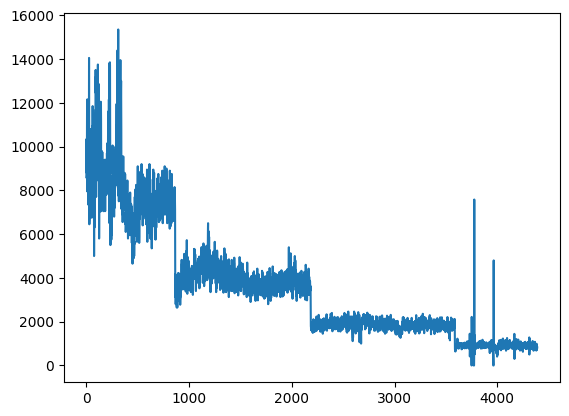

In [2]:
df['current_supply'].diff().plot()

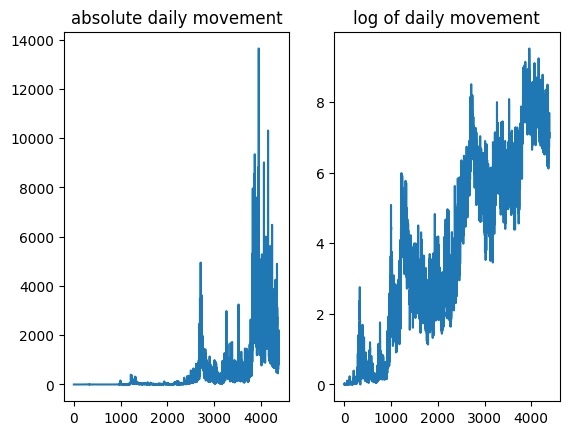

In [24]:
import numpy as np
import matplotlib.pyplot as plt
fig,axes = plt.subplots(ncols=2)
axes[0].set_title('absolute daily movement')
(df['high']-df['low']).plot(ax = axes[0])
np.log((df['high']-df['low'])+1).plot(ax = axes[1])
axes[1].set_title('log of daily movement');

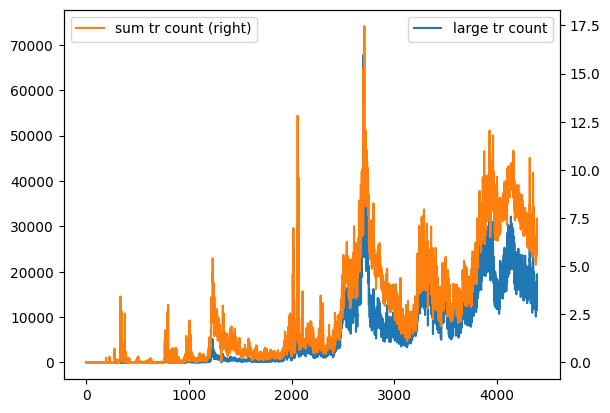

In [23]:
df['large_tr_count_pct'] = df['large_transaction_count'] / df['transaction_count'] * 100
ax1 = df['large_transaction_count'].plot(label='large tr count')
# df['transaction_count'].plot(label='sum tr count')
ax2 = df['large_tr_count_pct'].plot(label='sum tr count',secondary_y = True)
ax1.legend()
ax2.legend(loc='upper left')

#### SSA


<AxesSubplot:>

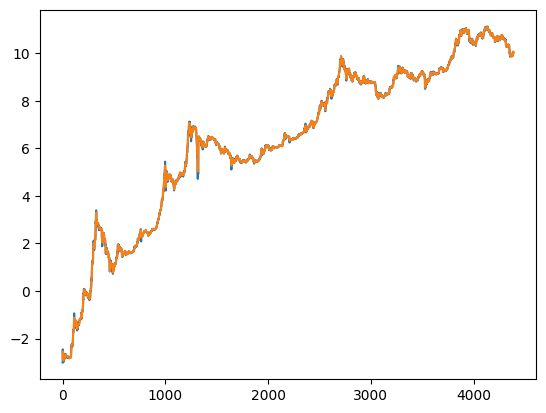

In [25]:
import pandas as pd
import numpy as np
from pyts.decomposition import SingularSpectrumAnalysis
transformer = SingularSpectrumAnalysis(window_size=5)
X_new = transformer.transform(np.log(df['close'].values.reshape(1,-1)))
tr_df = pd.DataFrame(data=np.transpose(X_new))
np.log(df['close']).plot()
(tr_df[1]+tr_df[0]).plot()


### Some more logs

<AxesSubplot:>

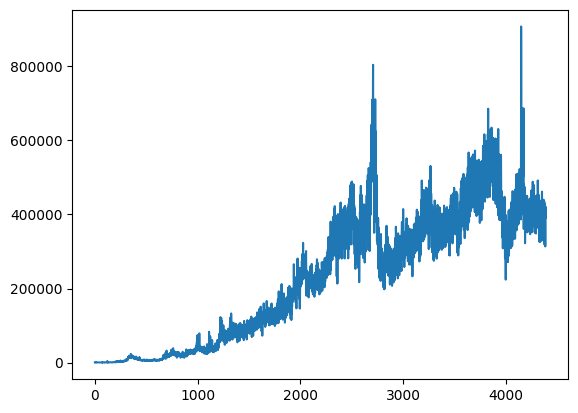

In [27]:
df['new_addresses'].plot()